In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings(action='ignore') # 경고 무시
plt.rc('font', family='NanumGothic') # 한클

Text(0, 0.5, '두번째 특성')

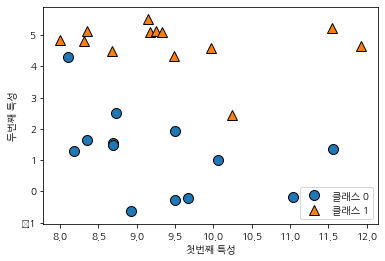

In [3]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫번째 특성")
plt.ylabel("두번째 특성")

In [4]:
X.shape

(26, 2)

Text(0, 0.5, '타깃')

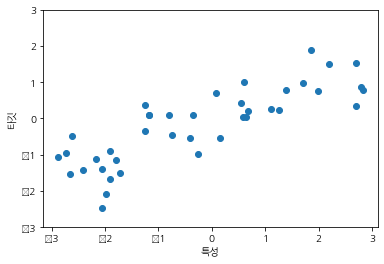

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
cancer.data.shape

(569, 30)

In [8]:
{feature: c for feature, c in zip(cancer.target_names, np.bincount(cancer.target))}

{'malignant': 212, 'benign': 357}

In [9]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.data.shape

(506, 13)

In [11]:
X, y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

## k-Nearest Neighbors

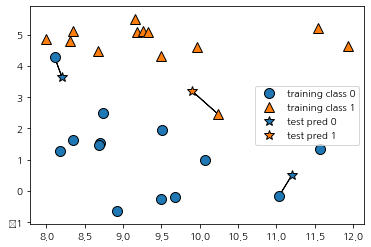

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

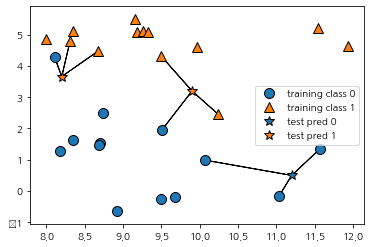

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [14]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [16]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [18]:
clf.score(X_test, y_test)

0.8571428571428571

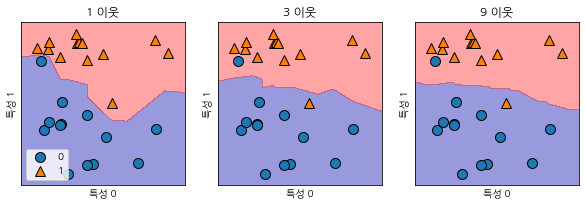

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

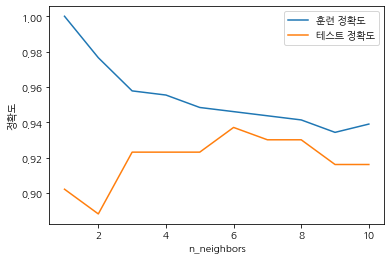

In [20]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings, test_accuracy, label='테스트 정확도')
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

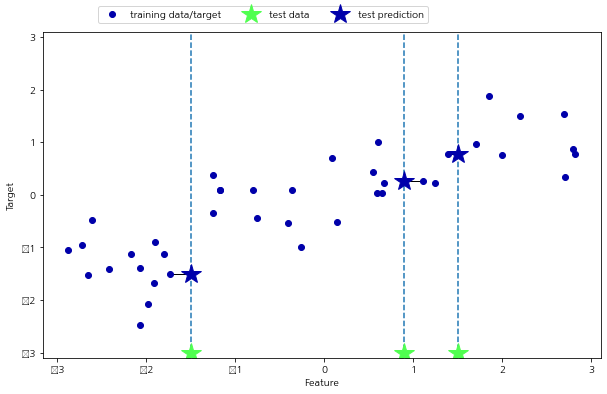

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

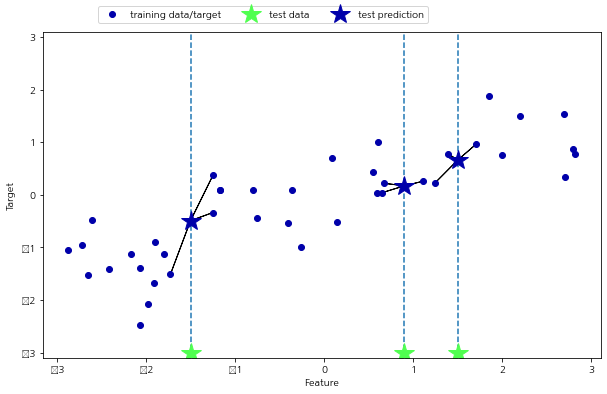

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [23]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [24]:
reg.score(X_test, y_test)

0.8344172446249605

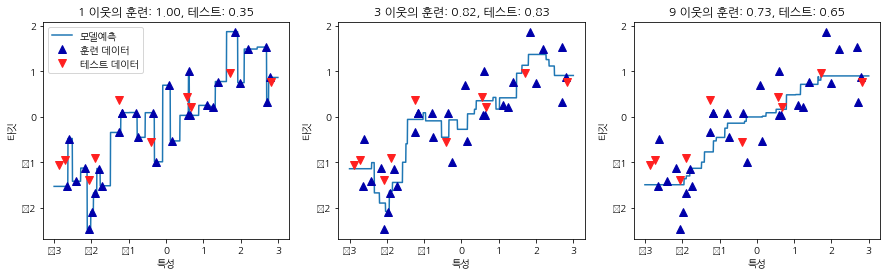

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line=np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} 이웃의 훈련: {:.2f}, 테스트: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(['모델예측', '훈련 데이터', '테스트 데이터'], loc='best')

## Linear Regression

w[0]: 0.393906  b: -0.031804


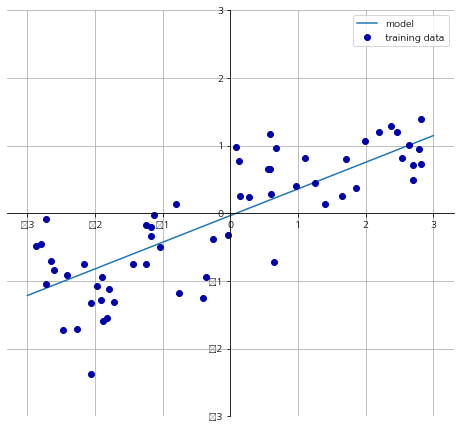

In [26]:
mglearn.plots.plot_linear_regression_wave()

In [27]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [28]:
lr.coef_, lr.intercept_

(array([0.39390555]), -0.031804343026759746)

In [29]:
lr.score(X_train, y_train)

0.6700890315075756

In [30]:
lr.score(X_test, y_test)

0.65933685968637

In [31]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [32]:
lr.score(X_train, y_train)

0.952051960903273

In [33]:
lr.score(X_test, y_test)

0.6074721959665708

## Ridge Regression

In [34]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

In [35]:
ridge.score(X_train, y_train)

0.885796658517094

In [36]:
ridge.score(X_test, y_test)

0.7527683481744755

In [37]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

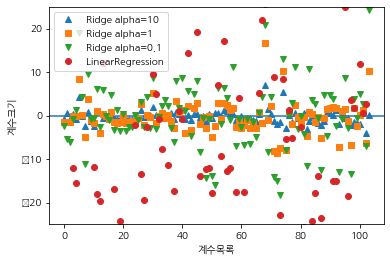

In [38]:
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')
plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel("계수목록")
plt.ylabel("계수크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

## Lasso

In [39]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

In [40]:
X_train.shape

(379, 104)

In [41]:
lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.29323768991114607, 0.20937503255272294)

In [42]:
np.sum(lasso.coef_ != 0)

4

In [43]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
lasso001.score(X_train, y_train), lasso001.score(X_test, y_test)

(0.8962226511086497, 0.7656571174549983)

In [44]:
np.sum(lasso001.coef_ != 0)

33

In [45]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
lasso00001.score(X_train, y_train), lasso00001.score(X_test, y_test)

(0.9507158754515467, 0.6437467421272709)

Text(0, 0.5, '계수크기')

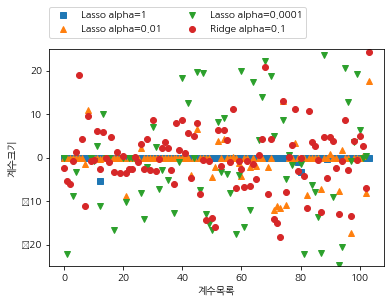

In [46]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')
plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수목록")
plt.ylabel("계수크기")

## Linear Classification

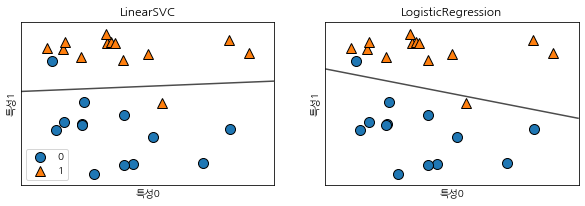

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")
    
axes[0].legend()
plt.show()

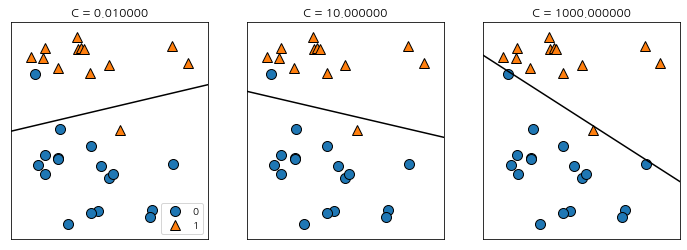

In [48]:
mglearn.plots.plot_linear_svc_regularization()

In [49]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.9577464788732394, 0.958041958041958)

In [50]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
logreg100.score(X_train, y_train), logreg100.score(X_test, y_test)

(0.9835680751173709, 0.965034965034965)

In [51]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
logreg001.score(X_train, y_train), logreg001.score(X_test, y_test)

(0.9530516431924883, 0.951048951048951)

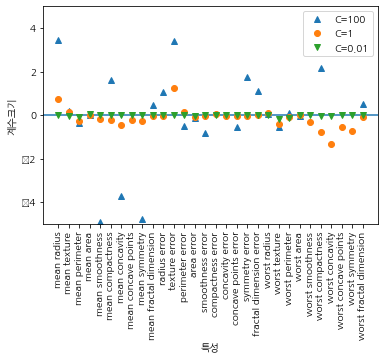

In [52]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수크기")
plt.legend()

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


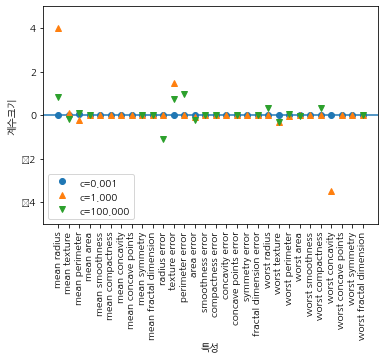

In [53]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty='l1', max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="c={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수크기")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

## Linear Multi Classification

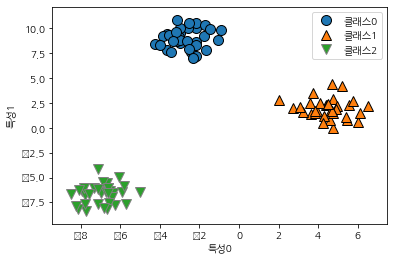

In [54]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성0")
plt.ylabel("특성1")
plt.legend(["클래스0", "클래스1", "클래스2"])
plt.show()

In [55]:
linear_svm = LinearSVC().fit(X, y)
linear_svm.coef_.shape, linear_svm.intercept_.shape

((3, 2), (3,))

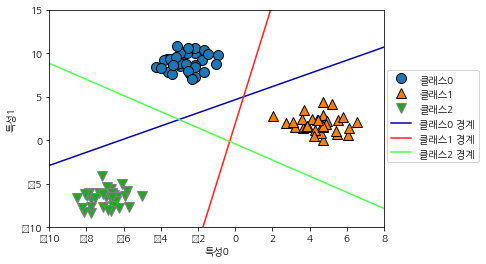

In [56]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성0")
plt.ylabel("특성1")
plt.legend(['클래스0', '클래스1', '클래스2', '클래스0 경계', '클래스1 경계', '클래스2 경계'], loc=(1.01, 0.3))
plt.show()

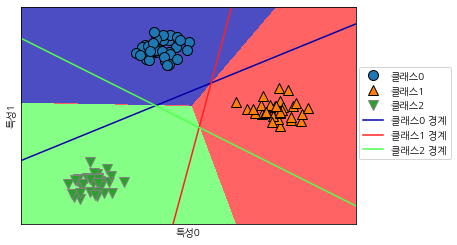

In [57]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel("특성0")
plt.ylabel("특성1")
plt.legend(['클래스0', '클래스1', '클래스2', '클래스0 경계', '클래스1 경계', '클래스2 경계'], loc=(1.01, 0.3))
plt.show()

### SGDClassifier, SGDRegressor

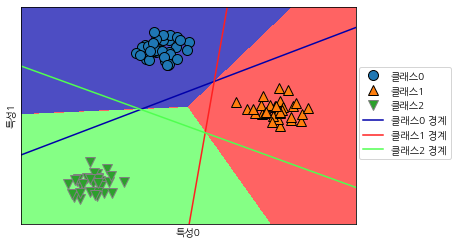

In [58]:
from sklearn.linear_model import SGDClassifier

sgd_c = SGDClassifier(alpha=0.01, learning_rate='adaptive', eta0=0.1, random_state=42, n_jobs=-1)

sgd_c.fit(X, y)

mglearn.plots.plot_2d_classification(sgd_c, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(sgd_c.coef_, sgd_c.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c=color)
plt.legend(["클래스0", "클래스1", '클래스2', '클래스0 경계', '클래스1 경계', '클래스2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성0")
plt.ylabel("특성1")
plt.show()

In [59]:
from sklearn.linear_model import SGDRegressor

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

sgd_r = SGDRegressor(learning_rate='adaptive', eta0=0.1, random_state=42)
sgd_r.fit(X_train, y_train)

sgd_r.score(X_train, y_train), sgd_r.score(X_test, y_test)

(0.9070757607443197, 0.769828026234392)

In [60]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(1.0, 0.9370629370629371)

In [61]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.9882629107981221, 0.951048951048951)

In [62]:
from sklearn.tree import export_graphviz

In [63]:
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

In [64]:
import graphviz

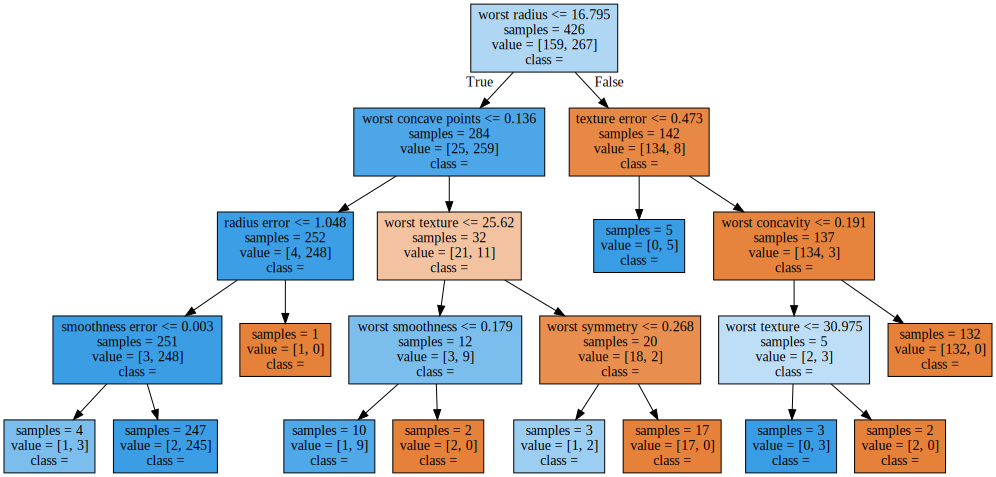

In [65]:
with open("tree.dot", encoding="UTF-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

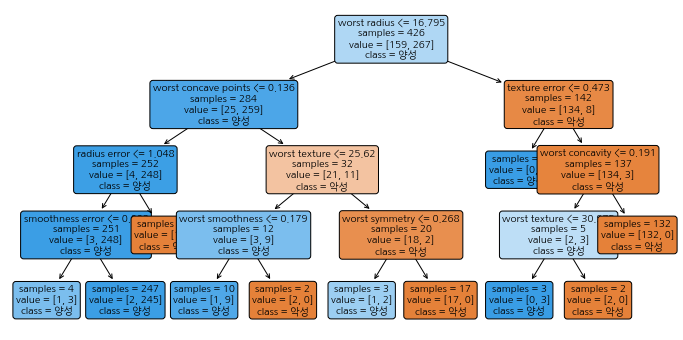

In [66]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 6))
plot_tree(tree, class_names=["악성", "양성"], feature_names=cancer.feature_names, 
         impurity=False, filled=True, rounded=True, fontsize=10)
plt.show()

In [67]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

In [68]:
cancer.feature_names[np.argmax(tree.feature_importances_)]

'worst radius'

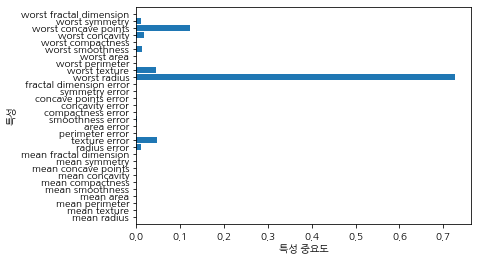

In [69]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

In [70]:
import os
import pandas as pd
ram_prices = pd.read_csv("data/ram_price.csv")
ram_prices.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


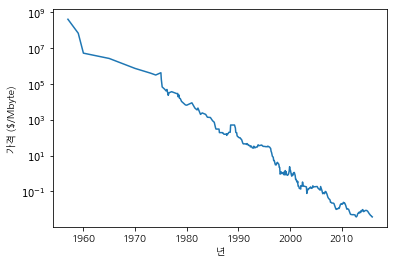

In [71]:
plt.yticks(fontname="DejaVu Sans")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")
plt.show()

In [72]:
from sklearn.tree import DecisionTreeRegressor
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date.to_numpy()[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

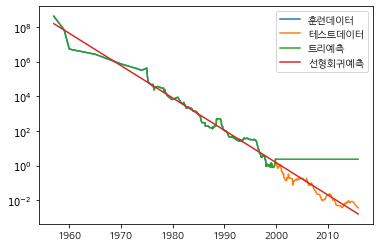

In [73]:
plt.yticks(fontname="DejaVu Sans")
plt.semilogy(data_train.date, data_train.price, label='훈련데이터')
plt.semilogy(data_test.date, data_test.price, label="테스트데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리예측")
plt.semilogy(ram_prices.date, price_lr, label='선형회귀예측')
plt.legend()
plt.show()

## RandomForest

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

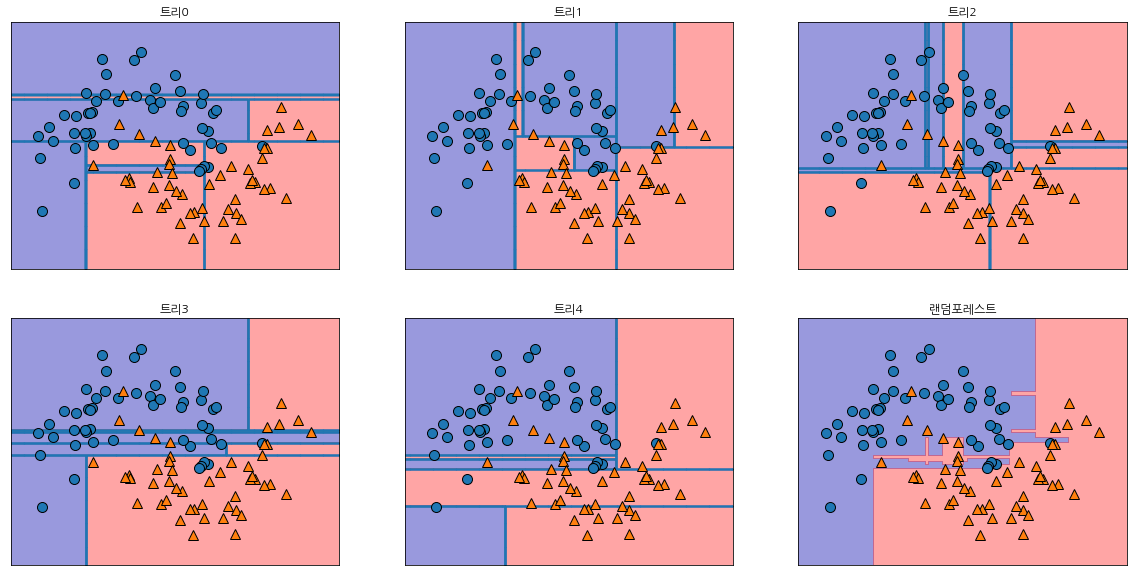

In [75]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리{}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

forest.score(X_train, y_train), forest.score(X_test, y_test)

(1.0, 0.972027972027972)

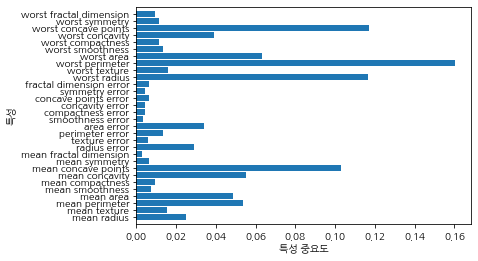

In [77]:
plot_feature_importances_cancer(forest)

## Gradient Boosting Algorithm

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(1.0, 0.965034965034965)

In [79]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(0.9906103286384976, 0.972027972027972)

In [80]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(0.9882629107981221, 0.965034965034965)

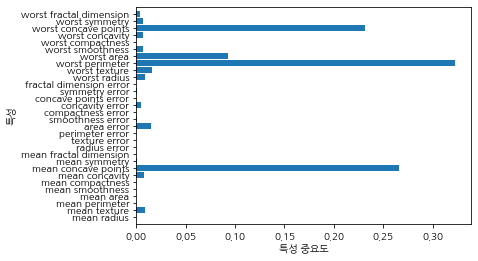

In [81]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

### dataset import

In [82]:
from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
xm_train, xm_test, ym_train, ym_test = train_test_split(xm, ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
xc_train, xc_test, yc_train, yc_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

## Bagging

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(solver='liblinear'), n_estimators=100,
                           oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(xc_train, yc_train)

BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear'),
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)

In [84]:
bagging.score(xc_train, yc_train), bagging.score(xc_test, yc_test)

(0.9624413145539906, 0.958041958041958)

In [85]:
bagging.oob_score_

0.9483568075117371

### Bagging with DecisionTree

In [86]:
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5,
                           n_jobs=-1, random_state=42)
bagging.fit(xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  n_jobs=-1, random_state=42)

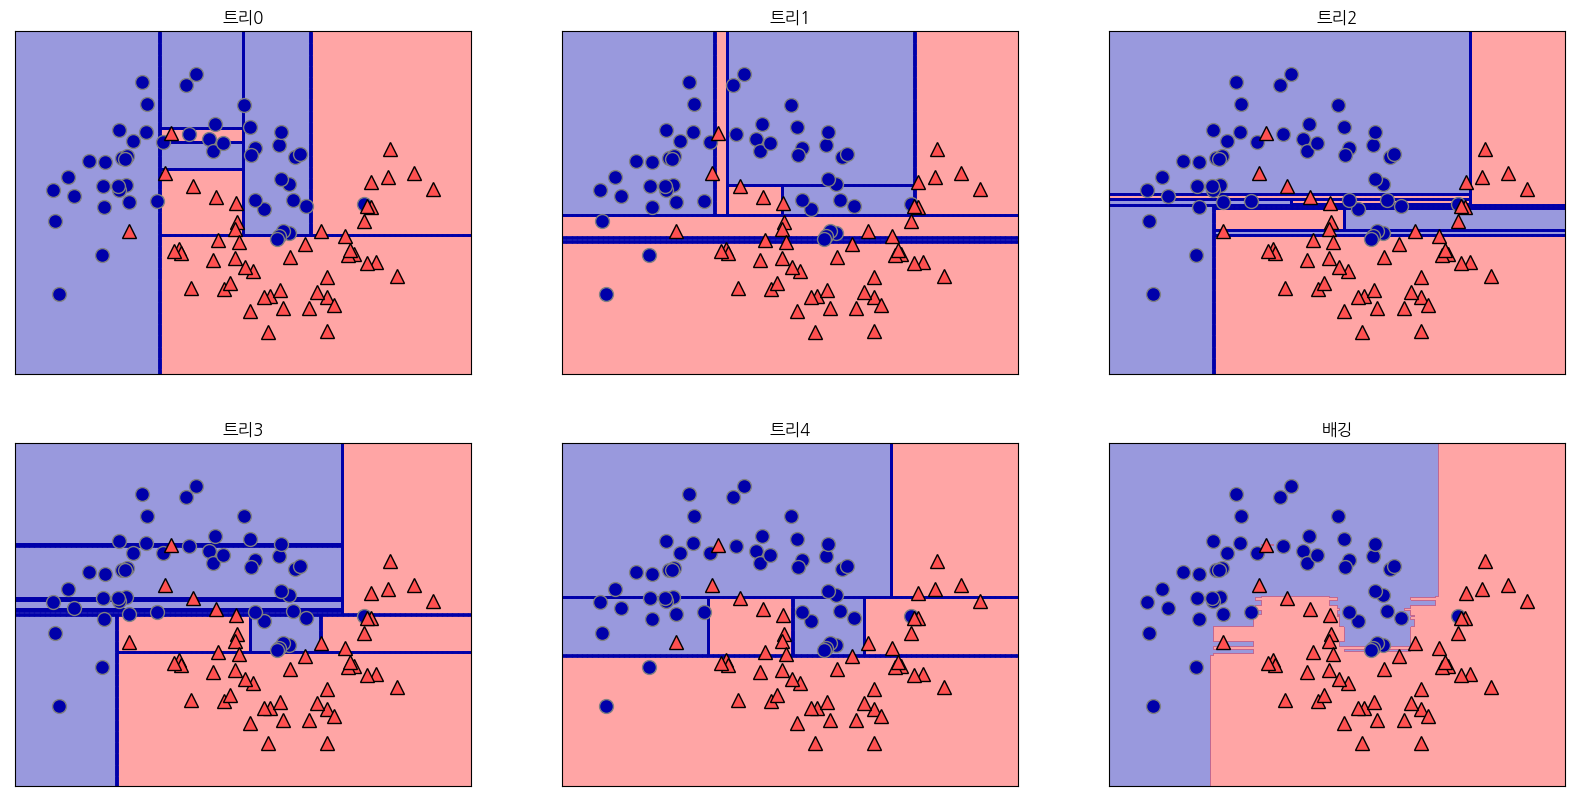

In [87]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("트리{}".format(i))
    mglearn.plots.plot_tree_partition(xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(bagging, xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("배깅")
mglearn.discrete_scatter(xm[:, 0], xm[:, 1], ym)
plt.show()

In [88]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, 
                           oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(xc_train, yc_train)

bagging.score(xc_train, yc_train), bagging.score(xc_test, yc_test)

(1.0, 0.965034965034965)

In [89]:
bagging.oob_score_

0.9483568075117371

## Extra-Trees

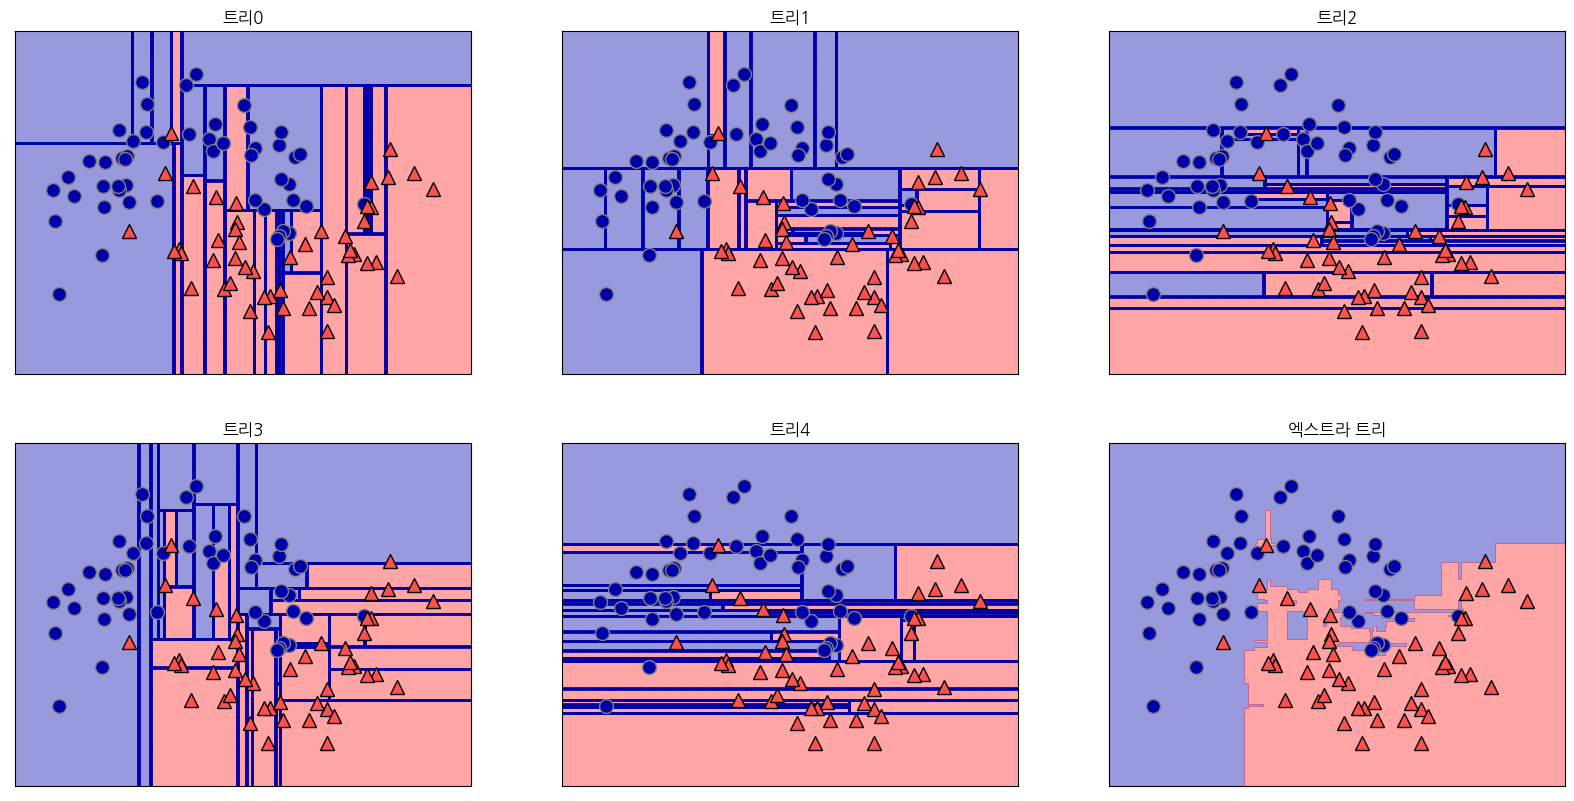

In [90]:
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(xm_train, ym_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title("트리{}".format(i))
    mglearn.plots.plot_tree_partition(xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(xtree, xm, fill=True, ax=axes[-1, -1], 
                               alpha=.4)
axes[-1, -1].set_title("엑스트라 트리")
mglearn.discrete_scatter(xm[:, 0], xm[:, 1], ym)
plt.show()

In [91]:
xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=0)
xtree.fit(xc_train, yc_train)

xtree.score(xc_train, yc_train), xtree.score(xc_test, yc_test)

(1.0, 0.972027972027972)

## kernelized support vector machines

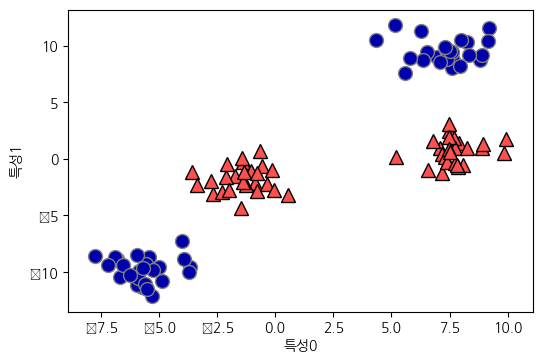

In [92]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성0")
plt.ylabel("특성1")
plt.show()

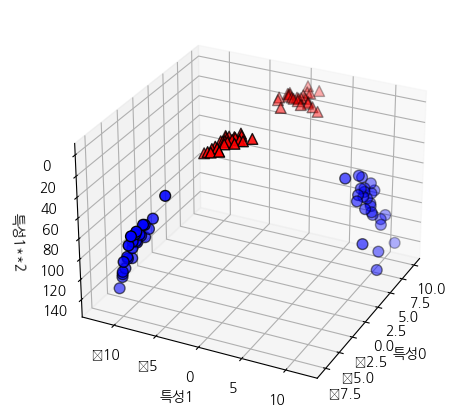

In [99]:
X_new = np.hstack([X, X[:, 1:]**2])

import matplotlib
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
if matplotlib.__version__ >= '3.4': 
    ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
    figure.add_axes(ax)
else:
    ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1**2")
plt.show()

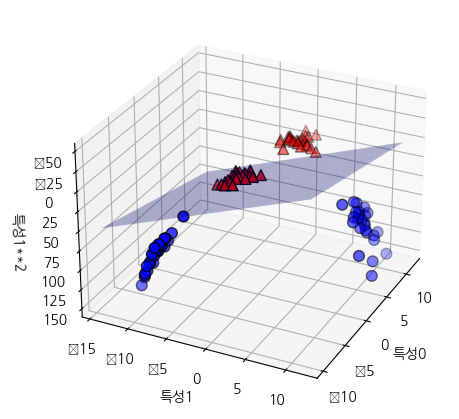

In [101]:
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
figure.add_axes(ax)
xx = np.linspace(X_new[:, 0].min()-2, X_new[:, 0].max()+2, 50)
yy = np.linspace(X_new[:, 1].min()-2, X_new[:, 0].max()+2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', 
          cmap = mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',
          marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1**2")
plt.show()

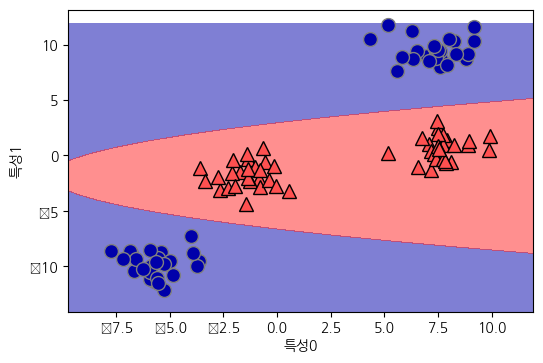

In [102]:
ZZ = YY**2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성0")
plt.ylabel("특성1")
plt.show()

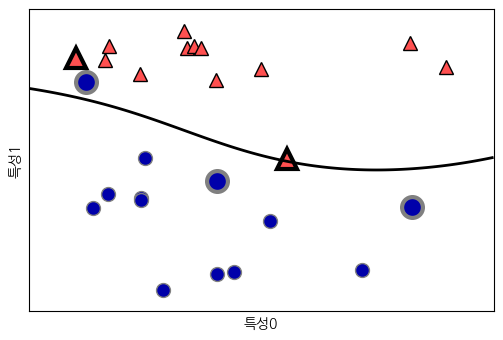

In [105]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성0")
plt.ylabel("특성1")
plt.show()

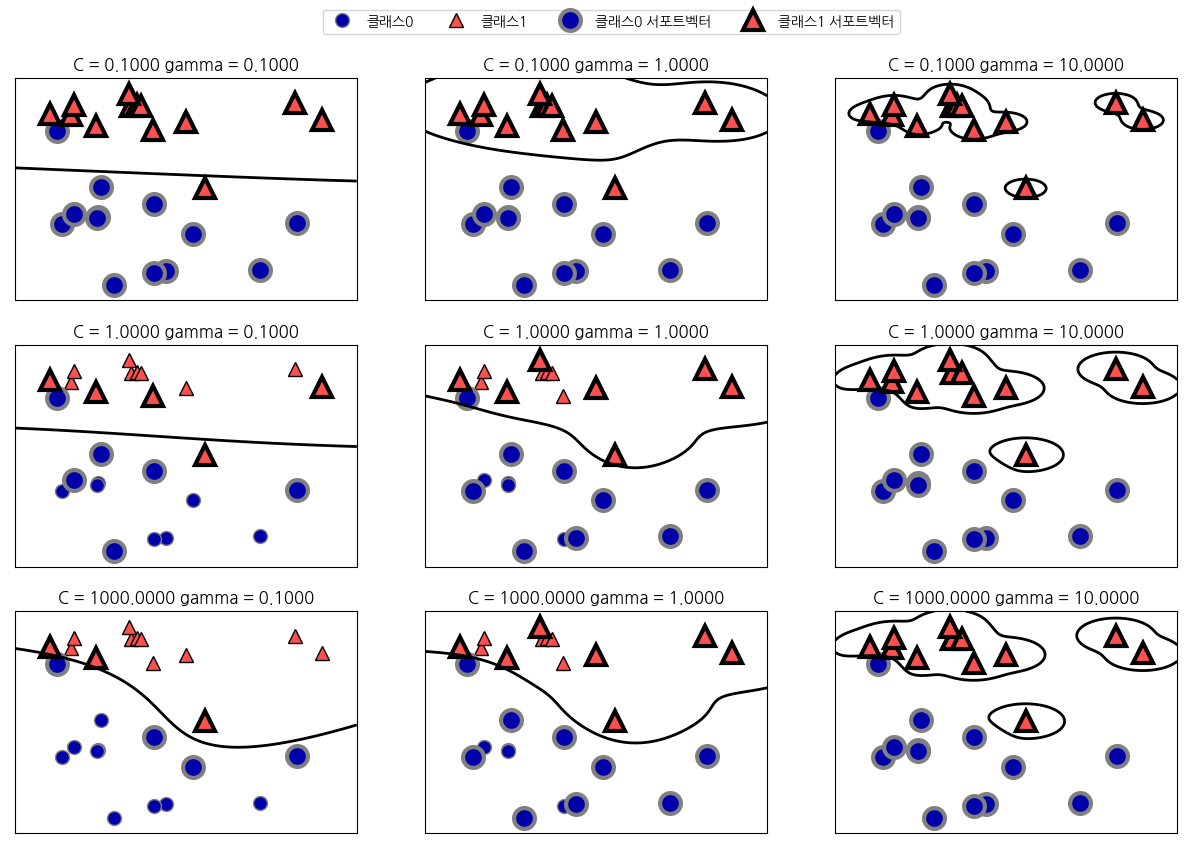

In [106]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["클래스0", "클래스1", "클래스0 서포트벡터", "클래스1 서포트벡터"],
                 ncol=4, loc=(.9, 1.2))
plt.show()

In [107]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

svc.score(X_train, y_train), svc.score(X_test, y_test)

(0.903755868544601, 0.9370629370629371)

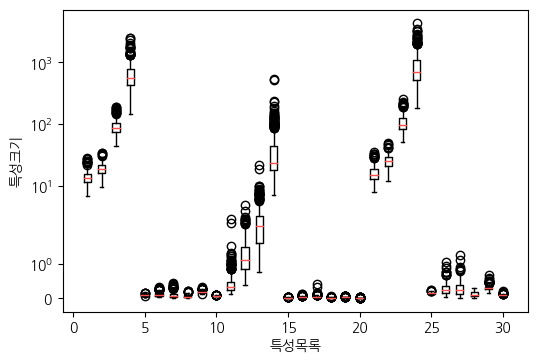

In [108]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("특성목록")
plt.ylabel("특성크기")
plt.show()

In [109]:
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training) / range_on_training
X_train_scaled.min(), X_train_scaled.max()

(0.0, 1.0)

In [110]:
X_test_scaled = (X_test - min_on_training) / range_on_training

In [111]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
svc.score(X_train_scaled, y_train), svc.score(X_test_scaled, y_test)

(0.9835680751173709, 0.972027972027972)

In [113]:
svc = SVC(C=20)
svc.fit(X_train_scaled, y_train)
svc.score(X_train_scaled, y_train), svc.score(X_test_scaled, y_test)

(0.9882629107981221, 0.9790209790209791)

## 분류예측의 불확실성 추정

In [114]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

In [115]:
gbrt.decision_function(X_test).shape

(25,)

In [116]:
gbrt.decision_function(X_test)[:5]

array([ 4.136, -1.702, -3.951, -3.626,  4.29 ])

In [117]:
print(gbrt.decision_function(X_test) > 0)
print(gbrt.predict(X_test))

[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [118]:
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[greater_zero]
np.all(pred == gbrt.predict(X_test))

True

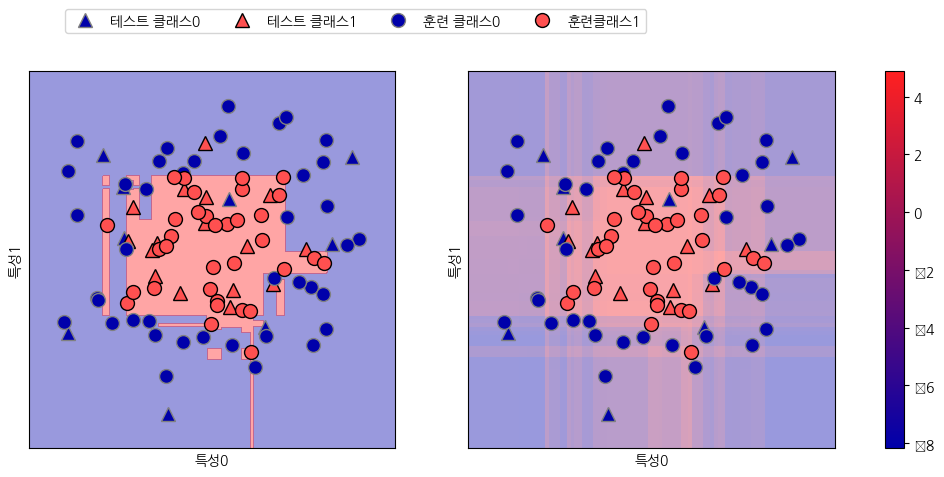

In [123]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, 
                               fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                           alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, 
                             markers="^", ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                            markers="o", ax=ax)
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['테스트 클래스0', '테스트 클래스1', '훈련 클래스0', '훈련클래스1'], ncol=4, loc=(.1, 1.1))
plt.show()

In [124]:
gbrt.predict_proba(X_test).shape

(25, 2)

In [125]:
gbrt.predict_proba(X_test)[:5]

array([[0.016, 0.984],
       [0.846, 0.154],
       [0.981, 0.019],
       [0.974, 0.026],
       [0.014, 0.986]])

In [126]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [127]:
gbrt.decision_function(X_test).shape

(38, 3)

In [128]:
gbrt.decision_function(X_test)[:6, :]

array([[-1.996,  0.048, -1.927],
       [ 0.061, -1.908, -1.928],
       [-1.991, -1.876,  0.097],
       [-1.996,  0.048, -1.927],
       [-1.997, -0.135, -1.203],
       [ 0.061, -1.908, -1.928]])

In [129]:
print(np.argmax(gbrt.decision_function(X_test), axis=-1))
print(gbrt.predict(X_test))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
